**CV2023 - week4**

**HOMEWORK**
 
 * **2bp** Using the demo [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py),experiment on mean-shift clustering applying various [kernels](https://scikit-learn.org/stable/modules/gaussian_process.html#kernels-for-gaussian-processes). Can you relate the clustering reuslts to the properties of the used kernel?

* **2bp** What is trhe time complexity class of the MeanShift Algorithm? What step of the algoritmh is the most time-consuming? How can you use a KD-tree to improve the time-efficiency? Use the *KDTree*, to speed up the *Mean Shift* algorithm. Compare the runtime against the resolution of the input image.

* **2bp** Using the same randomly generated set of samples as in Task 1, implement clustering using the k-NN algorithm. Using the description [here](https://users.cs.cf.ac.uk/dave/Vision_lecture/node35.html), implement the Region Growing image segmentation algorithm using the 1-NN approach.   

* **2bp** Explain the differences and similarities between the *EM* clustering and the *k-Means* algorithm. Assess their performance on a randomly generated dataset (see [this](https://scikit-learn.org/stable/modules/clustering.html)), when coupling clustering algorithms with [kernels](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels).


1. **Mean Shift Algorithm**

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.


**References**

* [About k-means and Mean Shift](http://vision.stanford.edu/teaching/cs131_fall1617/lectures/lecture13_kmeans_mean_shift_cs131_2016)

* Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.

* [Scikit MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# set figure size
plt.rcParams["figure.figsize"] = (14, 8)

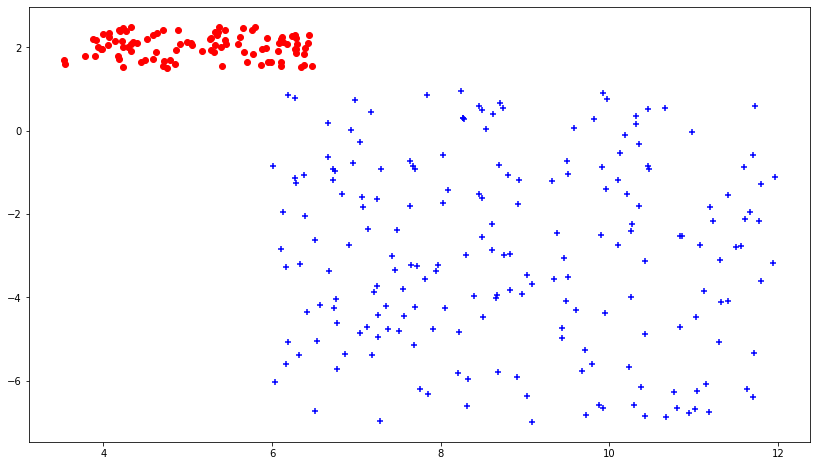

In [13]:
 
# simulate 2 rectangular clusters with uniform points density
xs1 = 5  + 3 * (np.random.random((100, )) - 0.5)
ys1 = 2  + (np.random.random((100, )) - 0.5)

xs2 = 9  + 6 * (np.random.random((200, )) - 0.5)
ys2 = -3  + 8 * (np.random.random((200, )) - 0.5)

plt.scatter(xs1, ys1, marker="o", c='red')
plt.scatter(xs2, ys2, marker="+", c='blue')
plt.show()

Next, we should make an assumption about the particularities of the data we are trying to clusterize. More exactly, we will make a rough assumption about the position of the cluster centroid (it's position) and the *spread* (density) of the data characterizing each cluster.

In [14]:
x1 = np.vstack((xs1, ys1))
x2 = np.vstack((xs2, ys2))
data = np.hstack((x1, x2))
print(data.shape)

# initialization for the mean and radius of the ball for the MeanShift
m1 = np.array([[5], [1.5]])
r1 = 0.3
m2 = np.array([[7], [-6]])
r2 = 1


(2, 300)


In [15]:
def plot_clustering_state(data, means, radius, niter):
  plt.title("After {} iterations".format(niter))
  plt.scatter(data[0, :], data[1, :], marker="+", s=3, color='red')

  circles = []
  for i in range(means.shape[1]):
    circle1 = plt.Circle(means[:, i], radius[i], color='r', fill=False)
    circles.append(circle1)

  for circle in circles:
    plt.gca().add_patch(circle)


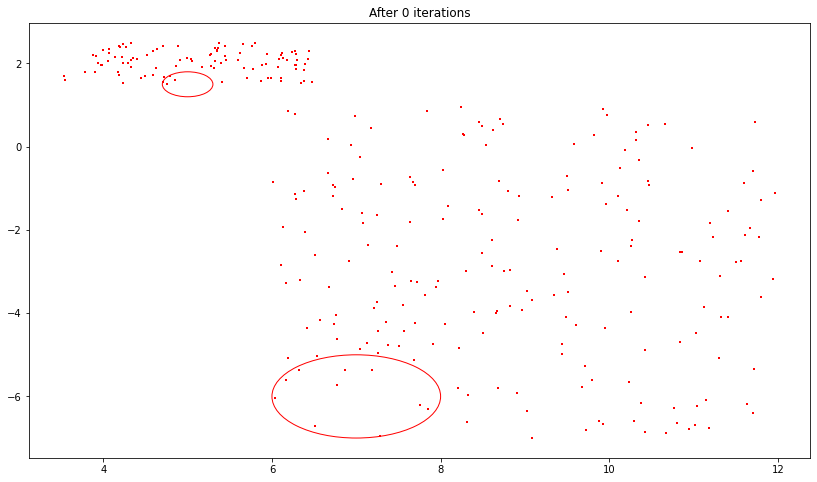

In [16]:
means = np.hstack((m1, m2))
radius = [r1, r2]
plot_clustering_state(data, np.hstack((m1, m2)), [r1, r2], 0)

In [17]:
# Now let's implement the mean shift procedure
means = np.hstack((m1, m2))
radius = [r1, r2]


def cluserize_mean_shift(data, mean_init, rad_init, maxiter):
  #use the args (thanks to AS)
  means = mean_init
  radius = rad_init
  
  niter = 0
  while niter < maxiter:
    # Find all datapoints in the local neighborhood
    for j in range(means.shape[1]):
      mean = means[:, j]
      local_points = []
      # find the points in the ball of radius r
      # since we have to compute the distances between eqach mean and each of the points
      # this will be computationally expensive in the 567-D feature space (7 * 81)
      for i in range(data.shape[1]):
        diff = data[:, i] - mean
        if np.inner(diff, diff) < radius[j] ** 2:
          local_points.append(data[:, i])

      # update the mean of the cluster as the mean of the points in the ball
      local_pts = np.array(local_points).T
      means[:, j] = local_pts.mean(axis=1)
    niter += 1
  plot_clustering_state(data, means, radius, niter)

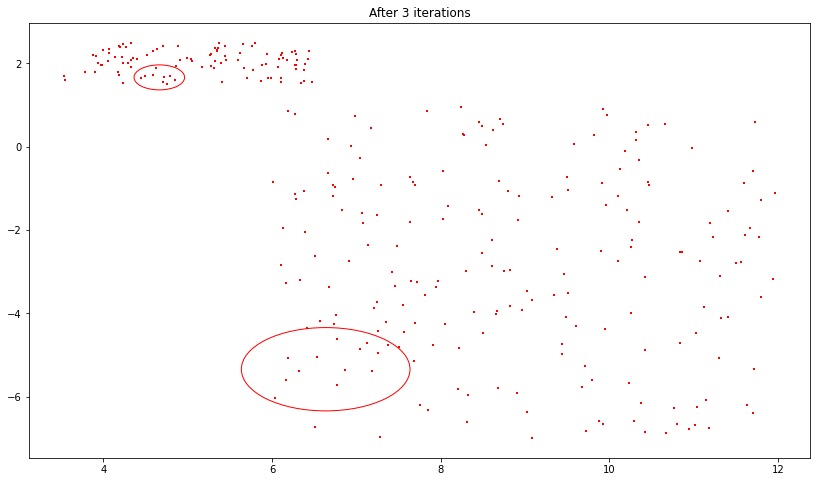

In [18]:
cluserize_mean_shift(data, mean_init=means, rad_init=radius, maxiter=3)

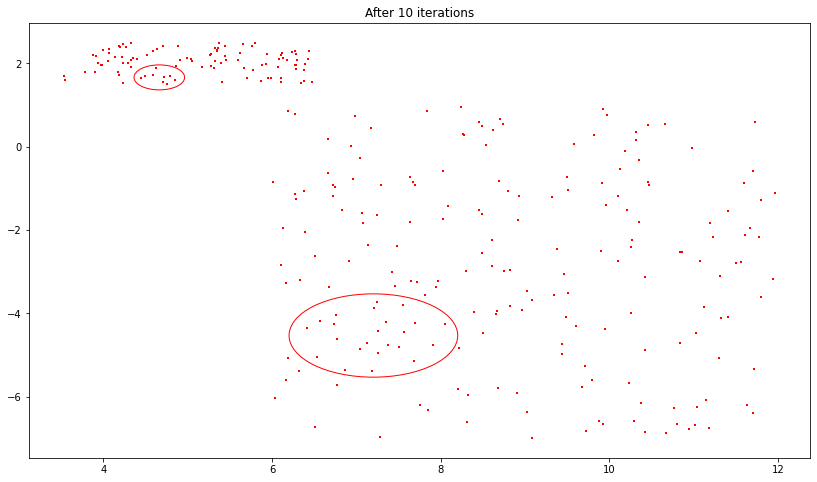

In [19]:
# given the particularities of the data (non gaussian spread and uniform density)
# the MeanShift algorithm can't work, as it is based on the assumption that the 
# direction of the trajectory of each ball is given by the direction of the 
# highest density of points
cluserize_mean_shift(data, mean_init=means, rad_init=radius, maxiter=10)

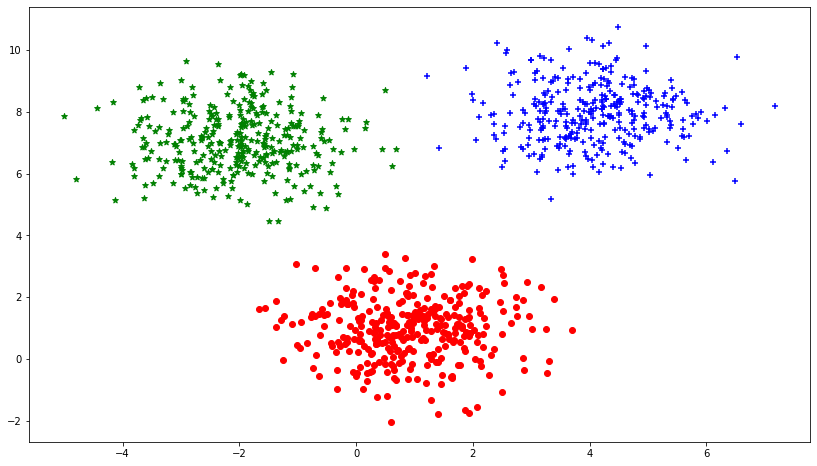

In [20]:
from sklearn.datasets import make_blobs


# generate some data according to 3 gaussian distributions
centers = np.array([[1, 1], [4, 8], [-2, 7]])
colors = ["red", "blue", "green"]
labels= ['o', '+', '*']

X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

x = X.T
for i in range(x.shape[1]):
  plt.scatter(x[0, i], x[1, i], marker=labels[y[i]], c=colors[y[i]])


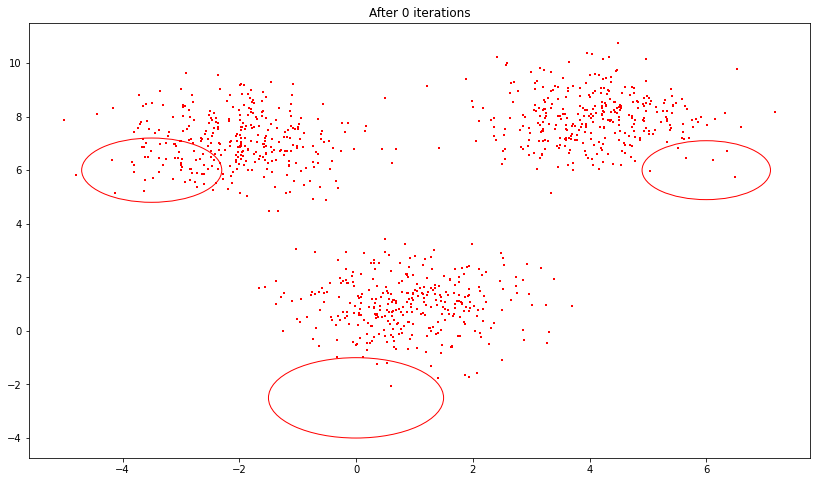

In [21]:
m1 = np.array([[0], [-2.5]])
r1 = 1.5
m2 = np.array([[6], [6]])
r2 = 1.1
m3 = np.array([[-3.5], [6]])
r3 = 1.2

means = np.hstack((m1, m2, m3))
radius = [r1, r2, r3]
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=0)

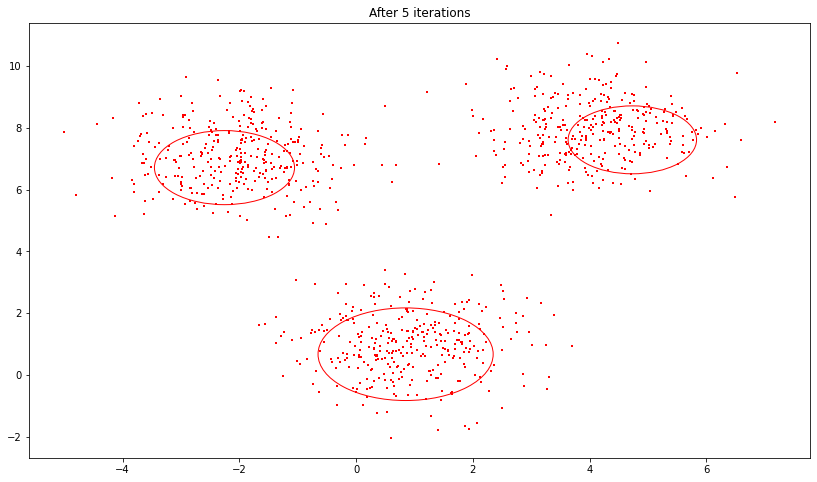

In [22]:
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=5)

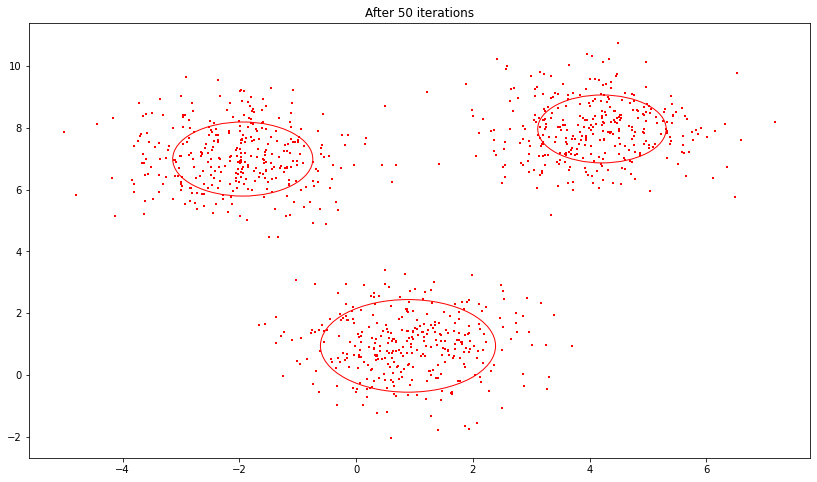

In [23]:
# compared to the last scenario, MeanShift works here, detecting the centers of the 
# clusters initialized in the data generation
cluserize_mean_shift(x, mean_init=means, rad_init=radius, maxiter=50)

**Mean Shift image segmentation**

In this task, we are going to apply the **MeanShift** algorithm as an Image Segmentation solution. The segmentation aims labeling semantically correct uniform regions as clusters of pixels, in the image representation space.

In [24]:
# this function is going to receive the vectorized Lab image
# the value of the pixel labeled
# the radius for the ball in Lab space used for MeanShift

# this is going to become exceptionally expensive in computation as this function is 
# called for each pixel in the image
def find_peak(img, x1, r):
  old_mean = np.zeros((3, 1))
  new_mean = x1.astype(np.float32)
  num_samples = img.shape[1]
  iter = 0

  while np.linalg.norm(new_mean - old_mean) > 1e-3 and iter < 10:
    iter += 1

    # for each pixel, we have to find the other pixels in a ball of radius r
    distances = np.zeros(num_samples)
    for j in range(num_samples):
      distances[j] = np.linalg.norm(img[:, j] - new_mean)
    
    neighbors_idx = np.argwhere(distances < r)
    neighbors = img[:, neighbors_idx].squeeze(-1) # img should be 3xnum_samples
    
    # update the mean only if the ball of radius r is not empty
    if neighbors.shape[1] > 0:
      old_mean = new_mean
      new_mean = neighbors.mean(axis=1)
    else:
      break
  
  return new_mean


def mean_shift_segmentation(img, radius):
  h, w, _ = img.shape
  img = img.astype(np.float32)
  arr_img = np.zeros((3, h * w))
  k = 0

  for i in range(h):
    for j in range(w):
      arr_img[:, k] = img[i, j, :].astype(np.float32)
      k += 1

  # segmentation map
  map = np.zeros((h, w))
  peaks = np.zeros((3, h * w))
  # number of found segments
  k = 0
  # do this for each pixel -> slow algorithm
  for i in range(h):
    for j in range(w):
      # find the cluster in which each pixel is going to be attributed through
      # the centroid found with MeanShift
      peak = find_peak(arr_img, img[i, j, :], radius)
      already_in = 0

      # check the existing clusters before adding new ones
      if k > 0:
        for h in range(1, k+1):
          # check the balls corresponding to other clusters
          # if the distance between the peak found by the MeanShift and the other known centroids
          # is smaller than r / 2, merge the pixel to the cluster already known
          if np.linalg.norm(peak - peaks[:, h - 1]) < radius / 2:
            already_in = h
            break
        
        # check if the label was found
        if already_in == 0: # add a new label, representing a new cluster (segment)
          k += 1
          map[i, j] = k
          peaks[:, k - 1] = peak
        else:
          map[i, j] = already_in # use the found label
          
      else: # first cluster is to be logged
        k += 1
        map[i, j] = k
        peaks[:, k - 1] = peak
    
  # trim zero values
  peaks = peaks[:, :k]
  return map, peaks


def visualize_segmentation_map(map):
  h, w = map.shape
  max_colors = int(map.max())
  colors = [np.random.randint(0, 255, size=(3,)).astype(np.uint8) for _ in range(max_colors)]
  output_image = np.zeros((h, w, 3), dtype=np.uint8)
  
  for i in range(int(h)):
    for j in range(int(w)):
      output_image[i, j, :] = colors[int(map[i, j]) - 1]

  plt.imshow(output_image)

 

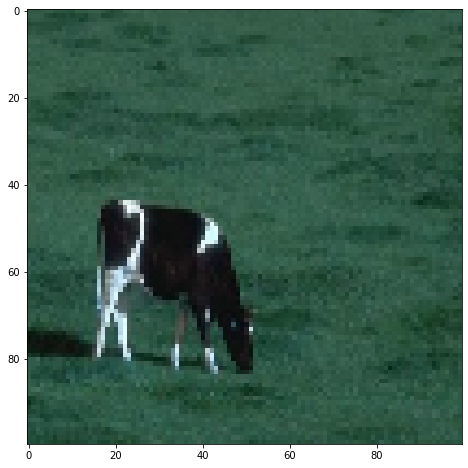

In [25]:
image_cow = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/cow.jpg")
image_cow = cv.resize(image_cow, (100, 100))
plt.imshow(image_cow)

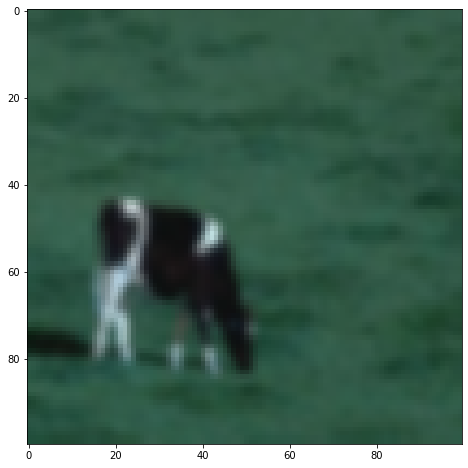

In [26]:
image_cow = cv.GaussianBlur(image_cow,(5, 5), 0)
plt.imshow(image_cow)

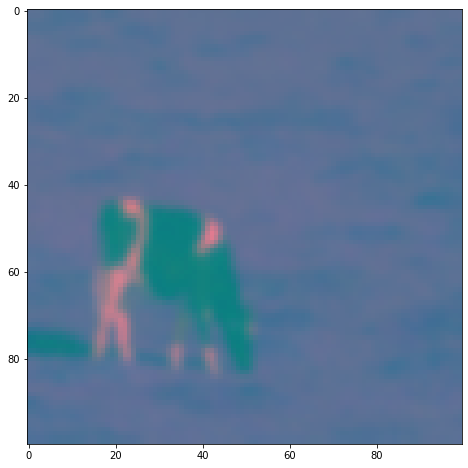

In [27]:
# perform the segmentation in the LAB image representation
img_lab = cv.cvtColor(image_cow, cv.COLOR_BGR2LAB)
plt.imshow(img_lab)

In [28]:
# computation done in the range of tens of minutes
map, peaks = mean_shift_segmentation(img_lab.astype(np.float32), radius=15)

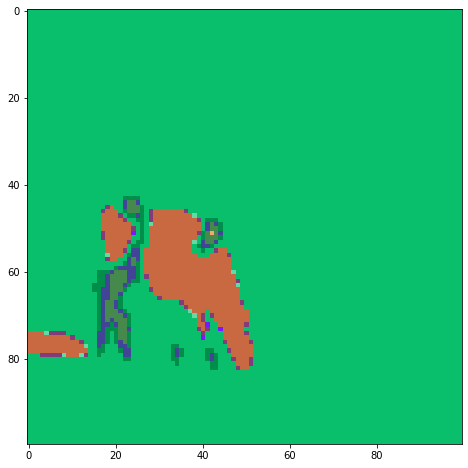

In [29]:
visualize_segmentation_map(map)

**2. K-Means image segmentation**

In [30]:
def generate_mu(X, K):
  N, d = X.shape
  mu = np.zeros((d, K)) 

  # use a min - max initialization to 
  # distribute the means across the range uniformly to get the best chance of 
  # capturing the whole illumination space in your image in one of the clusters
  min_vec = np.zeros(d)
  max_vec = np.zeros(d)

  # compute the bounds for the illumination space represented in the input image 
  for i in range(d):
    min_vec[i] = np.min(X[:, i])
    max_vec[i] = np.max(X[:, i])

  # do a linear interpolation between the min and the max value to generate the seeds 
  # of the clustering procedure
  for k in range(K):
    mu[:, k] = min_vec.T  + (k - 1) / K * (max_vec - min_vec).T
  
  return mu


# img is the Lab image
# K is the number of segments
def KMeans_segmentation(img, K, niter=10):
  # explicitly flatten the image to a hw x 3 array
  h, w, d = img.shape
  pixels = np.zeros((h * w, d))
  k = 0
  for i in range(h):
    for j in range(w):
      pixels[k, :] = img[i, j, :].astype(np.float32)
      k += 1
  
  map = np.zeros((h, w), dtype=np.uint8)
  # determine the values for the clustering seeds
  means = generate_mu(pixels, K)
  
  # phase 1 - assign each pixel to the closest mean
  # phase 2 - update the mean of each cluster
  N = pixels.shape[0]

  it = 0
  while it < niter:
    it += 1
    # phase 1 - find the closest cluster for each of the pixels and assign each 
    # pixel to its closest cluster
    for i in range(N):
      diff = means - np.repeat(np.array([pixels[i, :]]).T, K, axis=1)
      dist = np.linalg.norm(diff, axis=0)
      k = np.argmin(dist)
      map[i // w, i % w] = k
    
    # phase 2 - compute the means for each of the clusters as the average of the 
    # intensity values of the pixels assigned to that respective cluster
    for k in range(K):
      # find the pixels assigned to the cluster k
      cluster_idx = np.argwhere(map == k)
      # if any pixels, do the update
      if len(cluster_idx) > 0:
        cluster_idx = [ i * w + j for i, j in cluster_idx]
        cluster_pixels = pixels[cluster_idx]
        means[:, k] = np.mean(cluster_pixels, axis=0)
  
  return means, map

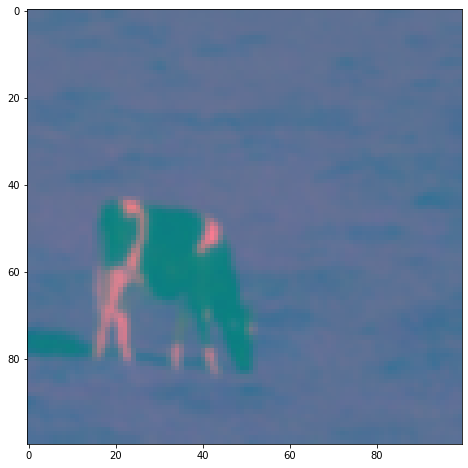

In [31]:
image_cow = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/cow.jpg")
image_cow = cv.resize(image_cow, (100, 100))
image_cow = cv.GaussianBlur(image_cow,(3, 3), 0)
# convert the image to the Lab image representation
img_lab = cv.cvtColor(image_cow, cv.COLOR_BGR2LAB)
plt.imshow(img_lab)

[[-37.2         21.4589372   77.95562436  93.15843162 170.3989899 ]
 [104.         126.97101449 113.25352597 112.8571884  125.36363636]
 [117.8        130.81320451 148.64052288 149.07618744 140.87373737]]


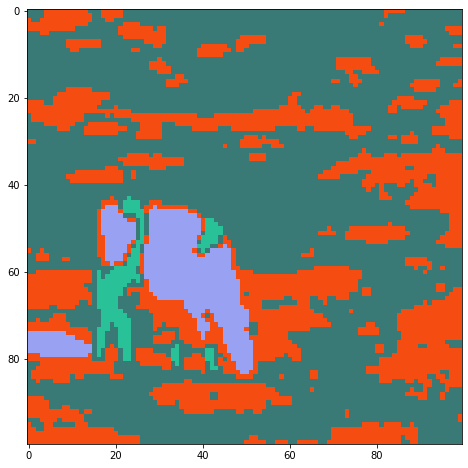

In [32]:
means, map = KMeans_segmentation(img_lab, K=5)
print(means)
visualize_segmentation_map(map)


3. **Expectation Maximization**

As discussed, the segmentation problem can be formulated as an optimization problem, aiming minimizing the intra-class variances for pixels in the same *segment*. Also, to minimize the number of *segments*, the inter-class variance has to be maximized. This can be done using *Gaussian Mixture Models*. 

**References**

* [About GMM](https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php)
* [GMM Thresholding](https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_GMM.html)
* [Python Image Processing Cookbook](https://books.google.ch/books?id=-9_dDwAAQBAJ&pg=PA245&lpg=PA245&dq=scikit+expectation+maximization+image+segmentation&source=bl&ots=TYf8QSS_MH&sig=ACfU3U2lj2nzHoQdiRE9Y26DB8zavHBCmA&hl=en&sa=X&ved=2ahUKEwiLuNG-iMHwAhWsg_0HHa9mDOoQ6AEwCnoECAcQAw#v=onepage&q=scikit%20expectation%20maximization%20image%20segmentation&f=false)

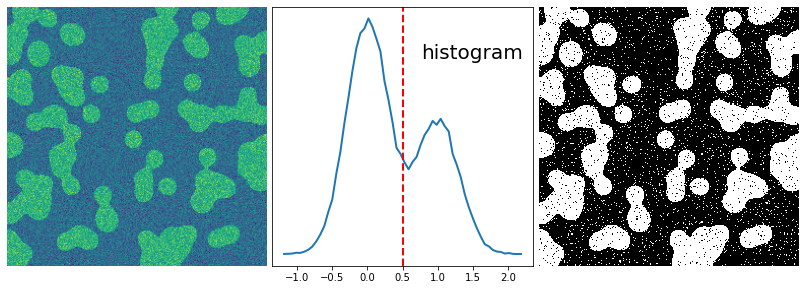

In [33]:
import numpy as np
from scipy import ndimage
from sklearn.mixture import GaussianMixture


# simulate 2 clusters and noise
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))

points = l * np.random.random((2, n**2)) # get 100 points between 1 and 255
im[(points[0]).astype(int), (points[1]).astype(int)] = 1 # set those points to 1
# build a gaussian filter and use the mean of the result as threshold
im = ndimage.gaussian_filter(im, sigma=l/(4.*n)) # apply a gaussian filter
mask = (im > im.mean()).astype(float) # binarize to get 2 segments

# smooth the image around the edges of the clusters
img = mask + 0.3 * np.random.randn(*mask.shape)
# compute the histogram of the input image
hist, bin_edges = np.histogram(img, bins=60)
# compute the centers of the bins as the average between the left corner of the 
# represented interval and the right corner
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))

#  use the threshold as the mean of the gaussian means
threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

Now, let's implement a Gaussian Mixture model by hand. We will define parameters(mean and variance) for a number of classes that will be provided. Each class is going to correspond to a normal distribution defined by mean and variance. Weights codding the appartenence to one of the classes (soft assignment) will be introduced, formulating this problem as a EM algorithm.

In [34]:
# X is the array-like image ((W*H) x 3)
# K is the observed number of classes

# generates the covariance initialization as the variance  matrix for each of the channels
def generate_cov(X, K):
  N, d = X.shape
  cov = np.zeros((d, d, K)) # 3D tensor stacking all 3x3 cov matrices

  # initialize all the cov matrices with the channel variance
  for i in range(K):
    sigma = np.eye(d)
    for j in range(d):
      sigma[j, j] = np.var(X[:, j]) # variance on each channel (L, a, b)
    cov[:, :, i] = sigma
  
  return cov


# this function generates means uniformly accross the image range
# for each channel
def generate_mu(X, K):
  N, d = X.shape
  mu = np.zeros((d, K)) 

  # use a min - max initialization to 
  # distribute the means across the range
  min_vec = np.zeros(d)
  max_vec = np.zeros(d)

  for i in range(d):
    min_vec[i] = np.min(X[:, i])
    max_vec[i] = np.max(X[:, i])

  for k in range(K):
    mu[:, k] = min_vec.T  + (k - 1)/ K * (max_vec - min_vec).T
  
  return mu

In [35]:
# this function computes the appartenence probability for each pixel
# mu - means, var - variance matrices, 
# alpha - class weights
# X - array like image
def expectation(mu, var, alpha, X):
  K = len(alpha)
  N, d = X.shape
  P = np.zeros((N, K)) # P_j, k = probability of the pixel m, n to in the cluster k (m,n = unravel(j))

  for i in range(N):
    for j in range(K):
      diff = X[i, :].T - mu[:, j]
      try:
        # compute the probability given the distance from each pixel to the mean of the cluster using a gaussian distribution
        prob = np.exp((-0.5 * diff @ np.linalg.inv(var[:, :, j]) @ diff.T)) / ((2 * np.pi)**(0.5 * d) * np.sqrt(np.linalg.det(var[:, :, j])))
      except np.linalg.LinAlgError:
        prob = 1 # all zero distance
      
      # update by the blending coefficient given the law of conditional probability
      P[i, j] = alpha[j] * prob
    
    P[i, :] = P[i, :] / np.sum(P[i, :]) # normalize to a prob distribution
  return P


def maximization(P, X):
  _, K = P.shape
  N, d = X.shape

  alpha = [0 for _ in range(K)]
  mu = np.zeros((d, K))
  var = np.zeros((d, d, K))

  # compute the weighted sums for the means and the variances, weighting by the 
  # probabilities of each pixel to belong in each cluster
  for i in range(K):
    for j in range(N):
      # update the blending coefficients for the clusters given the closed form solution
      alpha[i] = alpha[i] + P[j, i]
      mu[:, i] = mu[:, i] + P[j, i] * X[j, :].T  
    mu[:, i] = mu[:, i] / alpha[i]
  

  for i in range(K):
    for j in range(N):
      diff = np.expand_dims(X[j, :].T - mu[:, i], axis=1)
      var[:, :, i] = var[:, :, i] + P[j, i] * (diff @ diff.T)
    var[:, :, i] = var[:, :, i] / alpha[i]

  alpha = [1/N * alpha[i] for i in range(len(alpha))]
  return mu, var, alpha
  


In [36]:
def EM(img, K, niter=30, eps=1e-4):
  h, w, d = img.shape
  pixels = np.zeros((h * w, d))
  k = 0
  for i in range(h):
    for j in range(w):
      pixels[k, :] = img[i, j, :].astype(np.float32)
      k += 1
  
  # uniform blending coefficients
  alpha = [1/K for _ in range(K)]

  # initialize the parameters for the means and variances representing the clusters through gaussians
  mu = generate_mu(pixels, K)
  var = generate_cov(pixels, K)

  # the probability matrix
  P = np.zeros((h * w, K))
  it = 0

  # build an iterative procedure alternating between expectation and maximization
  while it  < niter:
    old_mu = mu
    P = expectation(mu, var, alpha, pixels)
    mu, var, alpha = maximization(P, pixels)
    new_mu = mu
    it += 1
    if np.linalg.norm(new_mu - old_mu) < eps:
      break

  map = np.zeros( w * h)
  for j in range(w * h):
    i = np.argmax(P[j, :])
    map[j] = i + 1

  map = map.reshape((h, w))
  cluster_centr = mu.T
  return map, cluster_centr

[[ 56.25304265 120.67909332 140.17065213]
 [ 14.46507746 128.45432571 128.48190161]
 [ 79.55851298 112.25613994 150.37863505]
 [ 90.24499322 112.65538529 149.10281022]
 [136.94607757 124.00473616 140.66078978]]


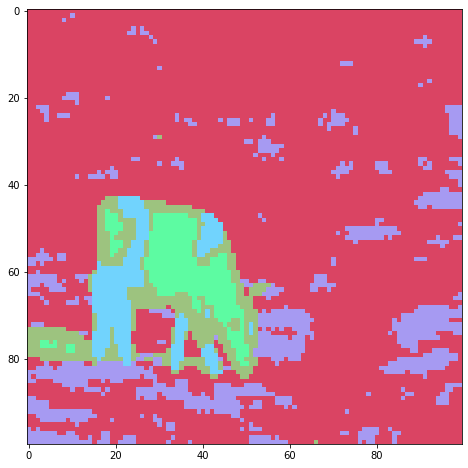

In [37]:
map, cluster_centr = EM(img_lab, K=5)
print(cluster_centr)

visualize_segmentation_map(map)